<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. データをきちんと取り込もう


## 2.2 人の知覚に近づける

人間の聴覚は、音声波形のパワーをそのまま受容しているのではなく、聴覚機構でスペクトルに変換して知覚している。

In [6]:
# サンプル音声を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.wav

--2021-10-25 00:30:24--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.wav [following]
--2021-10-25 00:30:24--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601132 (587K) [audio/wav]
Saving to: ‘sample1.wav’

sample1.wav         100%[===================>] 587.04K  --.-KB/s    in 0.006s  

2021-10-25 00:30:24 (93.9 MB/s) - ‘sample1.wav’

In [8]:
import IPython.display
IPython.display.Audio("sample1.wav")

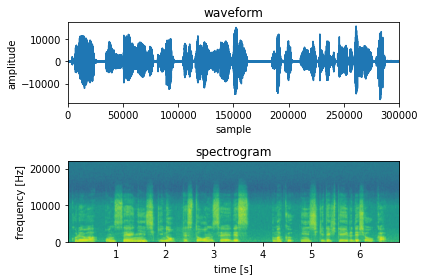

In [17]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

fs, speech_data = read('sample1.wav')
 
plt.subplot(2,1,1)
plt.title("waveform")
plt.plot(speech_data)
plt.xlim(0, len(speech_data))
plt.xlabel("sample")
plt.ylabel("amplitude")
 
plt.subplot(2,1,2)
plt.title("spectrogram")
plt.specgram(speech_data, Fs=fs)
plt.xlabel("time [s]")
plt.ylabel("frequency [Hz]")
 
plt.tight_layout()

## 2.3 特徴抽出をしやすくする処理

ノイズが付加された画像に対してノイズフィルタを適用。

In [14]:
# サンプル画像を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg

--2021-10-25 00:36:02--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg [following]
--2021-10-25 00:36:02--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1750 (1.7K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-10-25 00:36:02 (30.5 MB/s) - ‘sample1.jpg’ 

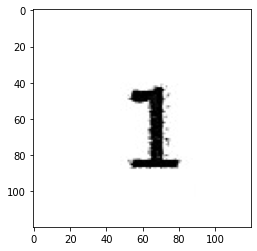

In [45]:
import numpy as np
import matplotlib.pyplot as plt

imagefile = 'sample1.jpg'
im = plt.imread(imagefile)
plt.imshow(im)
plt.gray()

平均値フィルタを適用。

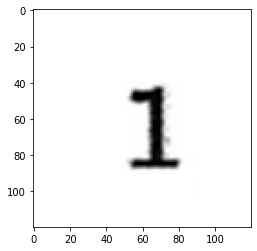

In [46]:
(h, w) = im.shape

filter1 = np.full((3,3), 1/9)
im2 = np.full_like(im, 255)

for y in range(1,h-1):
  for x in range(1,w-1):
    t = im[x-1:x+2, y-1:y+2]
    im2[x,y] = np.sum(np.multiply(t, filter1))

plt.imshow(im2)
plt.gray()

## 問題演習

上記の例を参考に、メディアンフィルタを実装せよ。．


## 解答例

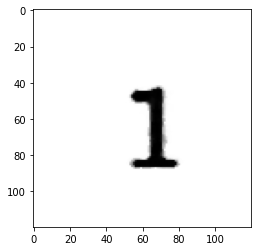

In [47]:
# メディアンフィルタ (5x5)
im3 = np.full_like(im, 255)

for y in range(2,h-2):
  for x in range(2,w-2):
    t = im[x-2:x+3, y-2:y+3]
    im3[x,y] = np.median(t)

plt.imshow(im3)
plt.gray()